# EDA

## Load Libraries and Data

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()

### Dataset

In [2]:
# Load Dataset
URL = "https://raw.githubusercontent.com/JoannaBroniarek/House-Prices-Advanced-Regression-Techniques/master/dane/train.csv"
df = pd.read_csv(URL)

## Data Inspection

### Basic Checks

In [3]:
# (rows, columns)
df.shape

(1460, 81)

In [4]:
# Column Names
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [5]:
# Column Data Types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# Separate into Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=[object]).columns
numerical_columns = df.select_dtypes(include=[int, float]).columns

print('Categorical Columns:')
display(categorical_columns)

print('Numerical Columns:')
display(numerical_columns)

Categorical Columns:


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical Columns:


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
# Get Information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Count non-NA rows
df.count().sort_values(ascending=False)

Id              1460
GrLivArea       1460
KitchenAbvGr    1460
BedroomAbvGr    1460
HalfBath        1460
                ... 
FireplaceQu      770
Fence            281
Alley             91
MiscFeature       54
PoolQC             7
Length: 81, dtype: int64

In [9]:
# Check columns with Object data type
df.dtypes[df.dtypes == 'O'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# Descriptive Statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Note: Count does not include NA rows
df.describe().transpose().style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [12]:
# Describe the target variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Sampling Data

In [13]:
# Display the first X values
df.head(5).style.background_gradient(cmap = "viridis")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [14]:
# Display the last X values
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [15]:
# Random Sample
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1297,1298,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1018,1019,80,RL,NaN,10784,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,160000
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000


### Numerical Columns

In [16]:
numerical_columns_ls = [col_name for col_name in df.columns if df.dtypes[col_name] != 'object']
numerical_columns_df = df[numerical_columns_ls]
numerical_columns_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


### Categorical Columns

In [17]:
categorical_columns_ls = [col_name for col_name in df.columns if df.dtypes[col_name] == 'object']
categorical_columns_df = df[categorical_columns_ls]
categorical_columns_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
# df.value_counts()

<AxesSubplot:>

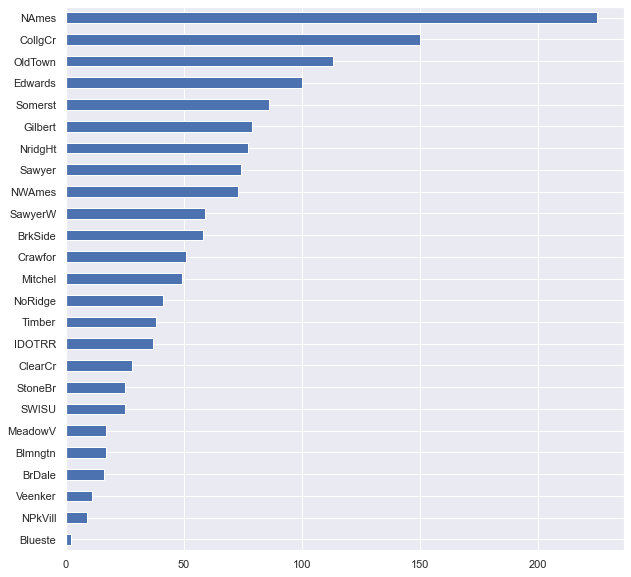

In [19]:
# Plot Value Counts
df['Neighborhood'].value_counts().sort_values().plot(kind='barh', figsize=[10,10])

In [20]:
# Print # of unique values in categorical columns
for column_name in categorical_columns_df:
    if df[column_name].dtypes == 'object':
        df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])
        unique_category = len(df[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

Feature 'MSZoning' has '5' unique categories
Feature 'Street' has '2' unique categories
Feature 'Alley' has '2' unique categories
Feature 'LotShape' has '4' unique categories
Feature 'LandContour' has '4' unique categories
Feature 'Utilities' has '2' unique categories
Feature 'LotConfig' has '5' unique categories
Feature 'LandSlope' has '3' unique categories
Feature 'Neighborhood' has '25' unique categories
Feature 'Condition1' has '9' unique categories
Feature 'Condition2' has '8' unique categories
Feature 'BldgType' has '5' unique categories
Feature 'HouseStyle' has '8' unique categories
Feature 'RoofStyle' has '6' unique categories
Feature 'RoofMatl' has '8' unique categories
Feature 'Exterior1st' has '15' unique categories
Feature 'Exterior2nd' has '16' unique categories
Feature 'MasVnrType' has '4' unique categories
Feature 'ExterQual' has '4' unique categories
Feature 'ExterCond' has '5' unique categories
Feature 'Foundation' has '6' unique categories
Feature 'BsmtQual' has '4' u

### Missing Data

In [21]:
# Percentage of Missing Data from a Specific Column
print('The Percentage of data missing in LotFrontage is', df['LotFrontage'].isnull().sum() / len(df) * 100)

The Percentage of data missing in LotFrontage is 17.73972602739726


In [22]:
# Filter DataFrame to missing values from a column
df.loc[df['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,Grvl,IR2,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,GdWo,Shed,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2009,WD,Normal,121000


In [23]:
# Get Missing Values per Column in the form a Series
total = df.isnull().sum().sort_values(ascending=False)
total

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [24]:
# Find Total and Percent of Missing Data in the form of a DataFrame
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing_data

,Total,Percent (%)
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Id,0,0.000000
KitchenAbvGr,0,0.000000
...,...,...
ExterQual,0,0.000000
MasVnrType,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000


<AxesSubplot:>

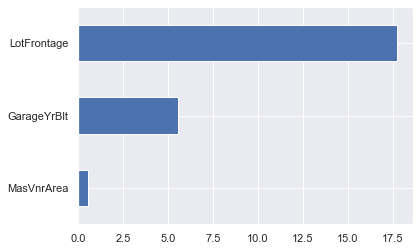

In [25]:
# Plot Columns with Missing Values (in Percentage)
missing_data['Percent (%)'][missing_data['Percent (%)'] > 0].sort_values().plot.barh()

In [26]:
missing_data['Percent (%)'][missing_data['Percent (%)'] > 0].index.values

array(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype=object)

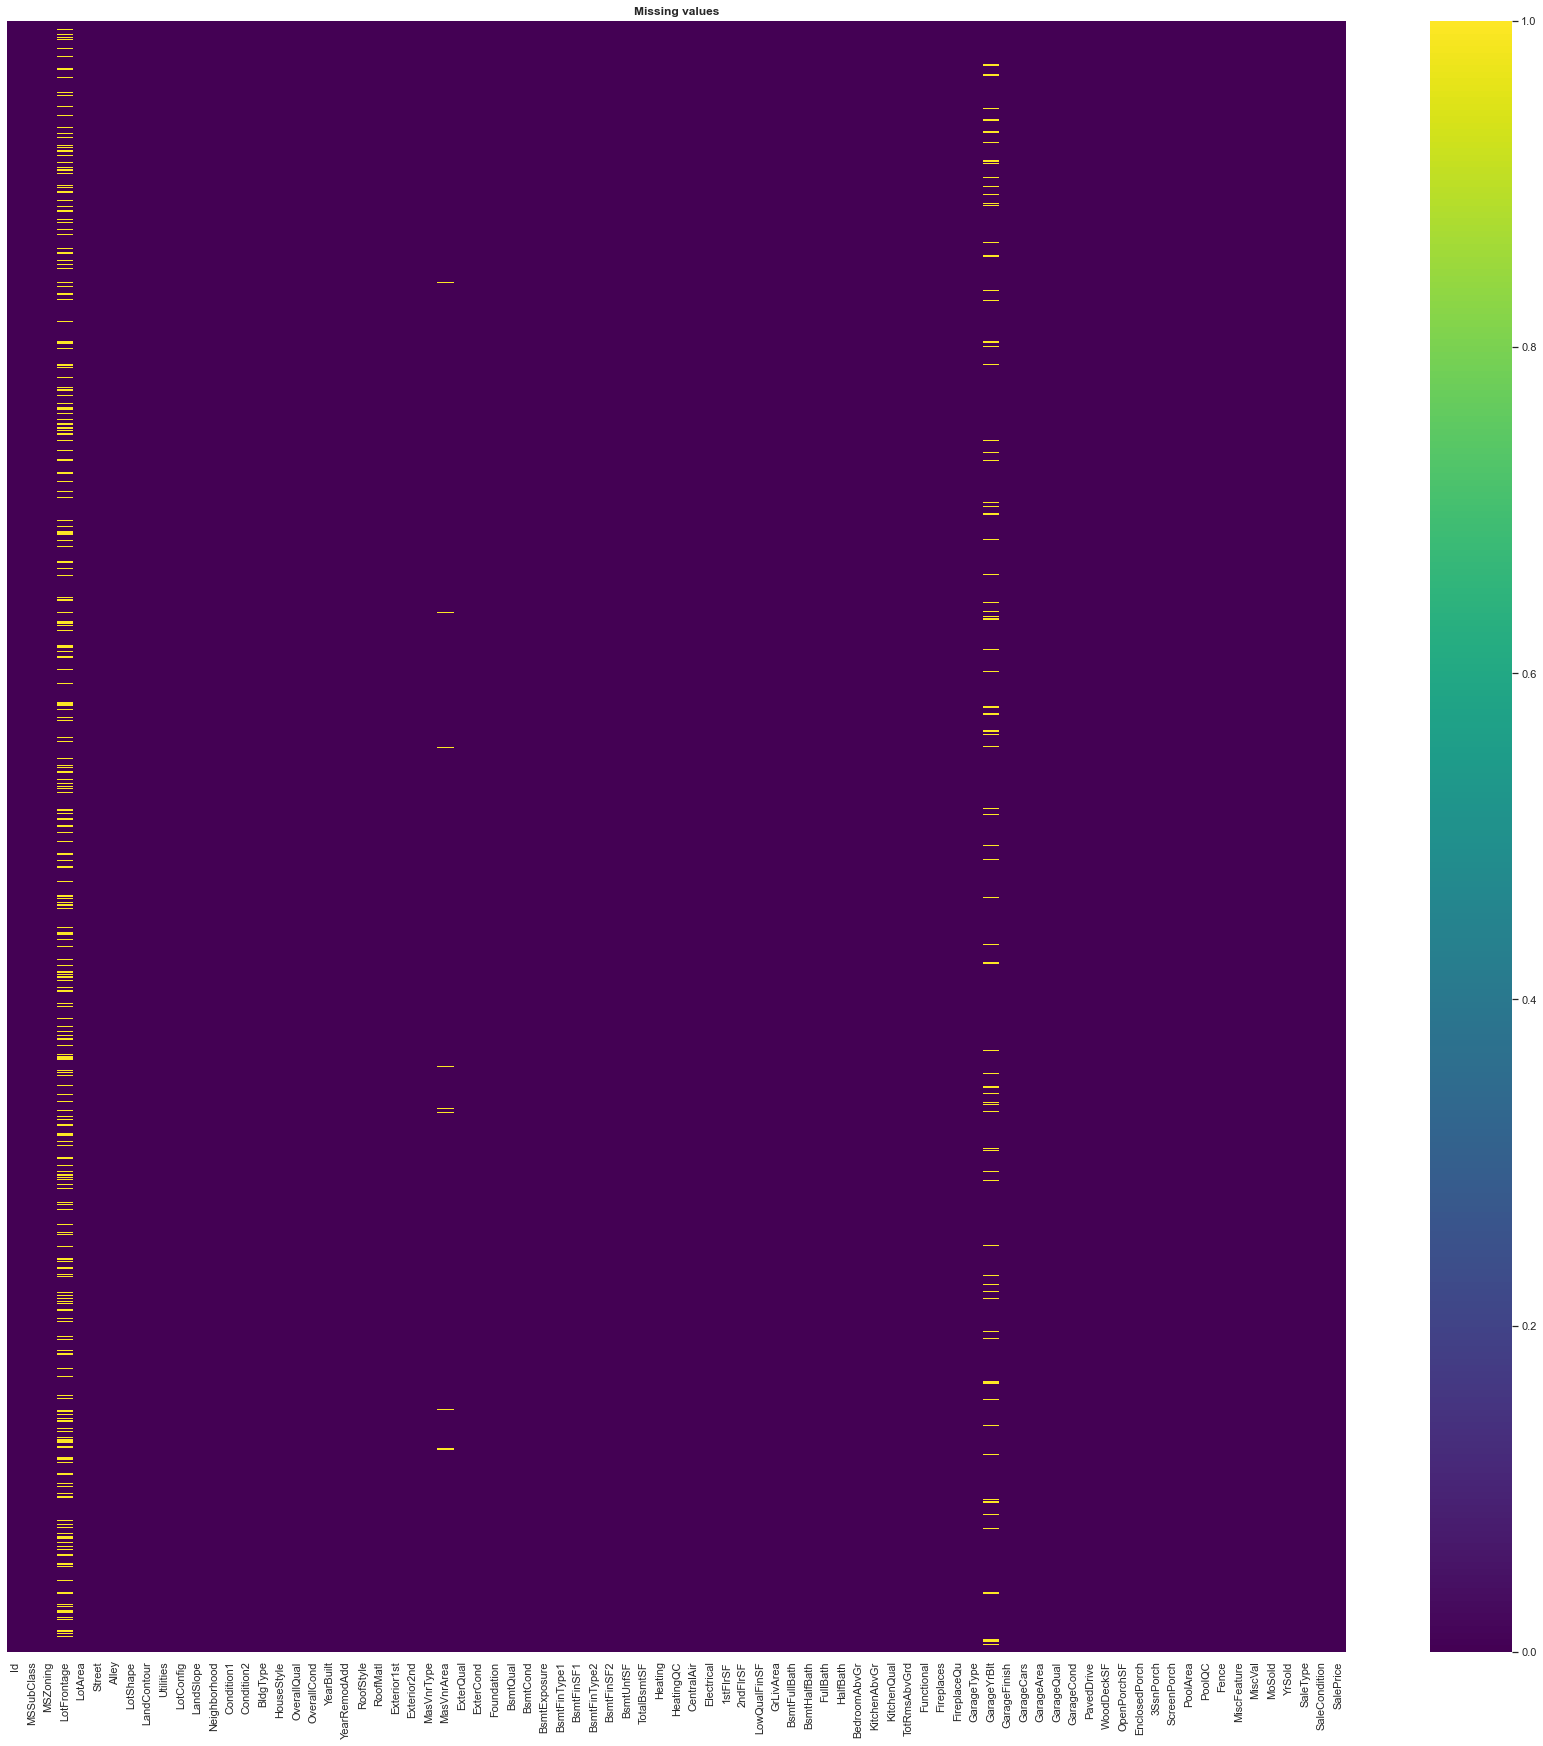

In [27]:
# Plot Missing Values per Column
# sns.heatmap(df.isnull(), cmap='YlGnBu')

plt.figure(figsize=(30,30))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(df.isnull(), yticklabels=False, cbar='viridis', cmap='viridis')

plt.show()

<AxesSubplot:>

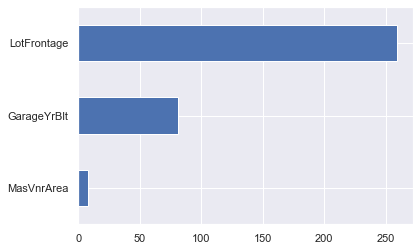

In [28]:
# Plot Column with Missing Values
missing_series = df.isnull().sum()
missing_series = missing_series[missing_series > 0]
missing_series.sort_values(inplace=True)
missing_series.plot.barh()

#### Dealing with Missing Data

In [29]:
# Drop all rows with missing values
df = df.dropna()

In [30]:
# Drop Certain Columns
df = df.drop([cols], axis=1)

# Alternative Equivalent
# df.drop([cols], axis=1, inplace=True)

NameError: name 'cols' is not defined

In [ ]:
# Replacing the NaN values with mean for LotFrontage
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = 70.0

In [ ]:
# Fill NaN values with a value
col = ['GarageYrBlt', 'MasVnrArea']
df[col] = df[col].fillna(0)

In [ ]:
# Go through Columns with empty rows and fill them with the Mean
for col_name in missing_data['Percent (%)'][missing_data['Percent (%)'] > 0].index.values:
    # Fill empty values with the mean
    df[col_name].fillna(df[col_name].mean(), inplace=True)

### Duplicated Data

In [ ]:
# Check for any duplicated data
df.duplicated().sum()

#### Dealing with Duplicated Data

In [ ]:
# Dropping Duplicated Data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

df.count()

df = df.drop_duplicates()
df.head(5)

## Data Visualization

### General

In [ ]:
df.columns.values

In [ ]:
# Histogram or Distribution Plots
# sns.distplot(df['PT08.S3(NOx)'])
plt.style.use('bmh')
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [ ]:
# Get skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [ ]:
# Scatter Plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,100))

In [ ]:
# Box Plot

# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

### Correlation Plot

In [ ]:
# cmap values: BrBG, coolwarm, YlGnBu

In [ ]:
df.columns.values

In [ ]:
# Correlation DataFrame
corrmat = df.corr(method='pearson')
corrmat

In [ ]:
fig, axis = plt.subplots(figsize = (30,15))

sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [ ]:
# Define correlation matrix
corr_matrix = df[numerical_columns].corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, annot=True)
plt.title("SalePrice Correlation")

In [ ]:
# Correlation Matrix Plot
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="BrBG", annot=True)

In [ ]:
# Zoomed In Correlation Matrix (Choose k highest correlation)
k = 5 # number of variables for heatmap
target_col = 'NOx(GT)'

cols = corrmat.nlargest(k, target_col)[target_col].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
        yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')

In [ ]:
# Normal Correlation
corrPearson = df.corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corrPearson, annot=True,fmt=".2f",linewidth=.20,cmap='BrBG',vmin=-1, vmax=+1)

In [ ]:
# Triangular Correlation (avoid duplication)
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corrPearson, dtype=np.bool))
heatmap = sns.heatmap(corrPearson, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [ ]:
# Get the top most correlating features with SalePrice (target)
corr = df.corr()["SalePrice"].sort_values(ascending=False)[:10] # selecting cols other than Saleprice, LogPrice
corr

#### Cluster Map

In [ ]:
# Cluster Map
k = 10
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , annot=True, cmap="YlGnBu",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

### Scatter Plot

In [ ]:
df.columns.values

In [ ]:
# Scatter Plot using Pandas
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [ ]:
# Individual Scatter Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['TotalBsmtSF'], df['SalePrice'])
ax.set_xlabel('TotalBsmtSF')
ax.set_ylabel('SalePrice')
plt.show()

In [ ]:
# Generte multple scatter plot for top correlated features
corr = df.corr()["SalePrice"].sort_values(ascending=False)[2:8] # selecting cols other than Saleprice, LogPrice

f,ax = plt.subplots(nrows=6, ncols=1, figsize=(20,40))
for i,col in enumerate(corr.index):    
    sns.scatterplot(x=col, y="SalePrice", data = df, ax = ax[i], color = 'darkorange')
    ax[i].set_title(f'{col} vs SalePrice')

### Pair Plot

In [ ]:
df.columns.values

In [ ]:
# Pair Plot for Specific Columns
var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[var_num])

In [ ]:
# Whole Scatterplot (PairPlot)
sns.set()
cols = ['T', 'RH', 'AH', 'NOx(GT)']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [ ]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(df[columns], size=2, kind ='scatter', diag_kind='kde')
plt.show()

### Distribution Plot

In [ ]:
sns.distplot(df["SalePrice"])

# skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [ ]:
# Log Transform
df["LogSalePrice"] = np.log10(df["SalePrice"])
sns.distplot(df["LogSalePrice"], color = 'r')

In [ ]:
import scipy.stats as st
y = df['SalePrice']

plt.figure(1); 
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); 
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); 
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

### Histogram

In [ ]:
# Plot Histogram for All
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Others
df.hist(bins=50, figsize=(20,20))
plt.show()

In [ ]:
# Frequency Plot
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [ ]:
figure = plt.figure(figsize=(10,8))
sns.histplot(df['SalePrice'], element="poly", color='blue', kde=True)

### Box Plot

In [ ]:
df.columns.values

In [ ]:
# Horizontal Box Plot
sns.boxplot(x=df['SalePrice'])

In [ ]:
# Box Plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [ ]:
# Interquantile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

for c in categorical_columns_ls:
    df[c] = df[c].astype('category')
    
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_columns_ls)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
# li_cat_feats = list(categorical_feats)
from lib2to3.pgen2.pgen import DFAState


nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(categorical_columns_ls):
            sns.boxplot(x=categorical_columns_ls[i], y=df['SalePrice'], data=df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  